# Sanity Check

Junita Sirait

In [1]:
import json
import csv
import pandas as pd
import numpy as np
import statistics

import tldextract

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn import metrics
from kneed import KneeLocator

from scipy.interpolate import make_interp_spline, BSpline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

import os

<a id="sub1"></a>
## Subreddit data

In [2]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")
mbfc_path = os.path.join(pd1, "data/mbfc")

In [3]:
with open (os.path.join(dfp,"gm_intersection.json"), "r", encoding = "utf-8") as infile:
    gm_intersection = json.load(infile)

In [4]:
len(gm_intersection)

42477

In [5]:
# Reading in all the subreddits in our files

with open(os.path.join(data_fp,"subreddit_ns_2021-01.json"), "r", encoding = "utf-8") as infile1a:
    subreddit_ns_jan = json.load(infile1a)

with open(os.path.join(data_fp,"subreddit_ns_2021-02.json"), "r", encoding = "utf-8") as infile2a:
    subreddit_ns_feb = json.load(infile2a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-03.json"), "r", encoding = "utf-8") as infile3a:
    subreddit_ns_march = json.load(infile3a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-04.json"), "r", encoding = "utf-8") as infile4a:
    subreddit_ns_april = json.load(infile4a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-05.json"), "r", encoding = "utf-8") as infile5a:
    subreddit_ns_may = json.load(infile5a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-06.json"), "r", encoding = "utf-8") as infile6a:
    subreddit_ns_jun = json.load(infile6a)

In [6]:
# ns_subreddit
with open(os.path.join(data_fp,"ns_subreddit_2021-01.json")) as infile1:
    ns_subreddit_01 = json.load(infile1)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-02.json")) as infile2:
    ns_subreddit_02 = json.load(infile2)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-03.json")) as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-04.json")) as infile4:
    ns_subreddit_04 = json.load(infile4)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-05.json")) as infile5:
    ns_subreddit_05 = json.load(infile5)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-06.json")) as infile6:
    ns_subreddit_06 = json.load(infile6)

In [7]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [8]:
sr_union_old = (set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

In [9]:
len(sr_union_old)

1619721

## Removing `u_`s

In [10]:
u_s = [s for s in sr_union_old if s.startswith("u_")]
len(u_s)

910554

In [11]:
u_s.append("AutoNewspaper")

In [12]:
u_s[:5]

['u_Freadbearisscary',
 'u_kakay02',
 'u_lexielioness',
 'u_jononit22',
 'u_Loud_function4573']

In [13]:
for f in files_sub:
    [f.pop(u) for u in u_s if u in f]

In [14]:
sr_union_old = (set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))
len(sr_union_old)

709166

Removing "reddit.com" and non_news from files_sub

In [15]:
non_news = []
with open("non_news.csv", "r", encoding="utf-8") as nn:
    r = csv.reader(nn, delimiter=",")
    counter = 0
    for row in r:
        if counter != 0:
            non_news.append(row[0])
        counter += 1
len(non_news)

133

In [16]:
# non_news = [] # for stat before removing non-news
# len(non_news)

In [17]:
for f in files_sub:
    for n in f:
        if 'reddit.com' in f[n]: f[n].pop('reddit.com')
        # removing each of the non_news
        for nns in non_news:
            if nns in f[n]: f[n].pop(nns)
    print("Done for a file")

Done for a file
Done for a file
Done for a file
Done for a file
Done for a file
Done for a file


Now that we have removed non_news from various subreddits, there would be subreddits that now does not have anything inside. Let's get rid of these subreddits as well.

In [18]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [19]:
for s in files_sub:
    empty_subs = set()
    for k in s:
        if len(s[k]) == 0: empty_subs.add(k)
    print(len(empty_subs))
    [s.pop(u) for u in empty_subs]
    print("done for a file")

184122
done for a file
184876
done for a file
204204
done for a file
210956
done for a file
247878
done for a file
264114
done for a file


In [20]:
for f in files_sub:
    [f.pop(u) for u in empty_subs if u in f]
    print("done for a file")

done for a file
done for a file
done for a file
done for a file
done for a file
done for a file


Instead of removing from files_ns, I will reconstruct files_ns from files_sub.

In [21]:
def ns_from_sub(subfile):
    d = defaultdict(dict)
    for sub in subfile:
        for n in subfile[sub]:
            d[n][sub] = subfile[sub][n]
    return d

In [22]:
ns_subreddit_01 = ns_from_sub(subreddit_ns_jan)
ns_subreddit_02 = ns_from_sub(subreddit_ns_feb)
ns_subreddit_03 = ns_from_sub(subreddit_ns_march)
ns_subreddit_04 = ns_from_sub(subreddit_ns_april)
ns_subreddit_05 = ns_from_sub(subreddit_ns_may)
ns_subreddit_06 = ns_from_sub(subreddit_ns_jun)

In [23]:
"reddit.com" in ns_subreddit_01

False

Let's use the intersection in an alphabetical order as a fixed order of our subreddits.

In [24]:
subs = sorted(set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

In [25]:
len(subs)

10015

## Intersections and unions of subreddits

In [26]:
# what about their intersection?
sr_intersection = (
      set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

print("intersection:", len(sr_intersection))

intersection: 10015


In [27]:
sr_union = (
      set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

print("union:", len(sr_union))

union: 42894


<a id="sub2"></a>
## News sources data

How many news sources are there?

In [28]:
# union
ns_union = (set(ns_subreddit_01) |
       set(ns_subreddit_02) |
       set(ns_subreddit_03) |
       set(ns_subreddit_04) |
       set(ns_subreddit_05) |
       set(ns_subreddit_06))

len(ns_union)

23417

In [29]:
nss = (set(ns_subreddit_01) &
       set(ns_subreddit_02) &
       set(ns_subreddit_03) &
       set(ns_subreddit_04) &
       set(ns_subreddit_05) &
       set(ns_subreddit_06))

In [30]:
num_ns = len(nss)
num_ns

8663

In [31]:
"u_toronto_news" in subreddit_ns_jan

False

In [32]:
len(subreddit_ns_jan)

18711

## For each news source, let's count in how many unique subreddits they appear

In [33]:
subreddit_count = dict()
for ns in ns_union:
    subreddit_count[ns] = len(set(ns_subreddit_01.get(ns, dict()).keys()) 
                               | set(ns_subreddit_02.get(ns, dict()).keys()) 
                               | set(ns_subreddit_03.get(ns, dict()).keys()) 
                               | set(ns_subreddit_04.get(ns, dict()).keys())
                               | set(ns_subreddit_05.get(ns, dict()).keys()) 
                               | set(ns_subreddit_06.get(ns, dict()).keys()))

`subreddit_count` stores in how many subreddits each news source appears.

In [34]:
subreddit_count['nytimes.com']

5438

In [35]:
subreddit_count_freq = dict(Counter(subreddit_count.values()).most_common())
subreddit_count_freq

{1: 4709,
 2: 2787,
 3: 1947,
 4: 1389,
 5: 1113,
 6: 906,
 7: 777,
 8: 649,
 9: 510,
 10: 478,
 11: 430,
 12: 374,
 13: 344,
 14: 314,
 15: 297,
 16: 258,
 17: 243,
 18: 212,
 19: 191,
 21: 186,
 20: 180,
 22: 170,
 24: 144,
 23: 128,
 25: 128,
 27: 126,
 28: 109,
 30: 103,
 29: 103,
 26: 102,
 32: 98,
 33: 96,
 37: 91,
 35: 82,
 31: 81,
 34: 78,
 36: 71,
 46: 70,
 41: 67,
 40: 67,
 44: 66,
 43: 65,
 45: 60,
 42: 60,
 39: 60,
 38: 55,
 49: 55,
 48: 50,
 53: 46,
 54: 46,
 47: 46,
 52: 45,
 50: 45,
 55: 43,
 56: 42,
 67: 40,
 51: 38,
 60: 35,
 73: 35,
 64: 33,
 66: 31,
 68: 31,
 57: 31,
 59: 30,
 62: 30,
 63: 29,
 80: 28,
 83: 26,
 69: 26,
 61: 26,
 72: 26,
 58: 25,
 86: 25,
 71: 25,
 74: 24,
 84: 23,
 81: 22,
 70: 22,
 79: 21,
 89: 21,
 75: 21,
 65: 20,
 85: 20,
 90: 19,
 92: 19,
 110: 19,
 76: 19,
 99: 18,
 78: 18,
 102: 18,
 87: 18,
 82: 17,
 91: 17,
 96: 17,
 109: 16,
 104: 15,
 101: 15,
 77: 15,
 121: 15,
 111: 14,
 88: 14,
 98: 14,
 144: 14,
 133: 13,
 119: 13,
 103: 13,
 115: 13,

`subreddit_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [36]:
max(subreddit_count_freq.keys())

5617

In [37]:
sde_ranked = Counter(subreddit_count).most_common()

for t in sde_ranked[:20]:
    sr, co = t
    if co > 1:
        print(f"{sr} is mentioned in {co} subreddits.")

theguardian.com is mentioned in 5617 subreddits.
nytimes.com is mentioned in 5438 subreddits.
cnn.com is mentioned in 5005 subreddits.
bbc.com is mentioned in 4241 subreddits.
reuters.com is mentioned in 3906 subreddits.
washingtonpost.com is mentioned in 3692 subreddits.
forbes.com is mentioned in 3488 subreddits.
cnbc.com is mentioned in 3357 subreddits.
bloomberg.com is mentioned in 3269 subreddits.
apnews.com is mentioned in 3084 subreddits.
businessinsider.com is mentioned in 3026 subreddits.
bbc.co.uk is mentioned in 2971 subreddits.
npr.org is mentioned in 2906 subreddits.
nbcnews.com is mentioned in 2815 subreddits.
independent.co.uk is mentioned in 2728 subreddits.
msn.com is mentioned in 2699 subreddits.
dailymail.co.uk is mentioned in 2693 subreddits.
vice.com is mentioned in 2581 subreddits.
nypost.com is mentioned in 2441 subreddits.
wsj.com is mentioned in 2409 subreddits.


In [38]:
sum(subreddit_count_freq.values()) == len(ns_union)

True

In [39]:
import itertools

In [40]:
scf = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in subreddit_count_freq.items()))

Text(0.5, 1.0, 'number of news sources appearing in x subreddits')

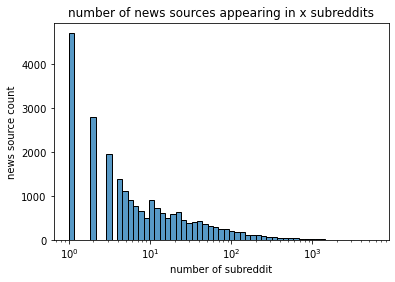

In [41]:
# sns.histplot([math.log(s,10) for s in scf])
sns.histplot(scf, log_scale=True)
plt.xlabel("number of subreddit")
plt.ylabel("news source count")
plt.title("number of news sources appearing in x subreddits")

How many news sources only appear in 10 subreddits or less? what about 9 or 8?

In [42]:
def pct_ns_in_k_subreddits(ks):
    ns_in_i_subreddit = [k for k in subreddit_count if subreddit_count[k] <= ks]
    count = len(ns_in_i_subreddit)
    print("There are {} news sources appearing in only {} subreddits or less ({}%)".format(count, ks, count/len(ns_union)))
    return count/len(ns_union)

In [43]:
pct_ns_in_k_subreddits(5)

There are 11945 news sources appearing in only 5 subreddits or less (0.5100995003629841%)


0.5100995003629841

In [44]:
0.15*len(ns_union)

3512.5499999999997

In [45]:
pct_in_k_subreddits = [(i, pct_ns_in_k_subreddits(i)) for i in range(1000)]

There are 0 news sources appearing in only 0 subreddits or less (0.0%)
There are 4709 news sources appearing in only 1 subreddits or less (0.20109322287227227%)
There are 7496 news sources appearing in only 2 subreddits or less (0.3201093222872272%)
There are 9443 news sources appearing in only 3 subreddits or less (0.40325404620574795%)
There are 10832 news sources appearing in only 4 subreddits or less (0.46256992783020884%)
There are 11945 news sources appearing in only 5 subreddits or less (0.5100995003629841%)
There are 12851 news sources appearing in only 6 subreddits or less (0.5487893410769954%)
There are 13628 news sources appearing in only 7 subreddits or less (0.581970363411197%)
There are 14277 news sources appearing in only 8 subreddits or less (0.6096852713840373%)
There are 14787 news sources appearing in only 9 subreddits or less (0.6314643207925866%)
There are 15265 news sources appearing in only 10 subreddits or less (0.6518768416107956%)
There are 15695 news sources 

There are 22031 news sources appearing in only 101 subreddits or less (0.9408122304308836%)
There are 22049 news sources appearing in only 102 subreddits or less (0.94158090276295%)
There are 22062 news sources appearing in only 103 subreddits or less (0.9421360550027758%)
There are 22077 news sources appearing in only 104 subreddits or less (0.9427766152794979%)
There are 22087 news sources appearing in only 105 subreddits or less (0.9432036554639791%)
There are 22099 news sources appearing in only 106 subreddits or less (0.9437161036853567%)
There are 22110 news sources appearing in only 107 subreddits or less (0.9441858478882863%)
There are 22121 news sources appearing in only 108 subreddits or less (0.9446555920912157%)
There are 22137 news sources appearing in only 109 subreddits or less (0.9453388563863859%)
There are 22156 news sources appearing in only 110 subreddits or less (0.9461502327369006%)
There are 22170 news sources appearing in only 111 subreddits or less (0.946748088

There are 22753 news sources appearing in only 196 subreddits or less (0.9716445317504377%)
There are 22755 news sources appearing in only 197 subreddits or less (0.971729939787334%)
There are 22760 news sources appearing in only 198 subreddits or less (0.9719434598795746%)
There are 22765 news sources appearing in only 199 subreddits or less (0.9721569799718154%)
There are 22767 news sources appearing in only 200 subreddits or less (0.9722423880087117%)
There are 22774 news sources appearing in only 201 subreddits or less (0.9725413161378486%)
There are 22779 news sources appearing in only 202 subreddits or less (0.9727548362300893%)
There are 22782 news sources appearing in only 203 subreddits or less (0.9728829482854336%)
There are 22787 news sources appearing in only 204 subreddits or less (0.9730964683776744%)
There are 22792 news sources appearing in only 205 subreddits or less (0.973309988469915%)
There are 22795 news sources appearing in only 206 subreddits or less (0.973438100

There are 23018 news sources appearing in only 292 subreddits or less (0.9829610966391937%)
There are 23022 news sources appearing in only 293 subreddits or less (0.9831319127129863%)
There are 23022 news sources appearing in only 294 subreddits or less (0.9831319127129863%)
There are 23023 news sources appearing in only 295 subreddits or less (0.9831746167314345%)
There are 23024 news sources appearing in only 296 subreddits or less (0.9832173207498826%)
There are 23025 news sources appearing in only 297 subreddits or less (0.9832600247683307%)
There are 23025 news sources appearing in only 298 subreddits or less (0.9832600247683307%)
There are 23029 news sources appearing in only 299 subreddits or less (0.9834308408421233%)
There are 23030 news sources appearing in only 300 subreddits or less (0.9834735448605714%)
There are 23033 news sources appearing in only 301 subreddits or less (0.9836016569159158%)
There are 23033 news sources appearing in only 302 subreddits or less (0.9836016

There are 23124 news sources appearing in only 391 subreddits or less (0.9874877225946962%)
There are 23125 news sources appearing in only 392 subreddits or less (0.9875304266131443%)
There are 23127 news sources appearing in only 393 subreddits or less (0.9876158346500405%)
There are 23128 news sources appearing in only 394 subreddits or less (0.9876585386684887%)
There are 23129 news sources appearing in only 395 subreddits or less (0.9877012426869368%)
There are 23129 news sources appearing in only 396 subreddits or less (0.9877012426869368%)
There are 23129 news sources appearing in only 397 subreddits or less (0.9877012426869368%)
There are 23131 news sources appearing in only 398 subreddits or less (0.9877866507238331%)
There are 23131 news sources appearing in only 399 subreddits or less (0.9877866507238331%)
There are 23131 news sources appearing in only 400 subreddits or less (0.9877866507238331%)
There are 23132 news sources appearing in only 401 subreddits or less (0.9878293

There are 23201 news sources appearing in only 480 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 481 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 482 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 483 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 484 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 485 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 486 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 487 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 488 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 489 subreddits or less (0.9907759320152026%)
There are 23201 news sources appearing in only 490 subreddits or less (0.9907759

There are 23241 news sources appearing in only 570 subreddits or less (0.9924840927531281%)
There are 23242 news sources appearing in only 571 subreddits or less (0.9925267967715762%)
There are 23242 news sources appearing in only 572 subreddits or less (0.9925267967715762%)
There are 23242 news sources appearing in only 573 subreddits or less (0.9925267967715762%)
There are 23242 news sources appearing in only 574 subreddits or less (0.9925267967715762%)
There are 23242 news sources appearing in only 575 subreddits or less (0.9925267967715762%)
There are 23243 news sources appearing in only 576 subreddits or less (0.9925695007900244%)
There are 23244 news sources appearing in only 577 subreddits or less (0.9926122048084725%)
There are 23245 news sources appearing in only 578 subreddits or less (0.9926549088269206%)
There are 23245 news sources appearing in only 579 subreddits or less (0.9926549088269206%)
There are 23246 news sources appearing in only 580 subreddits or less (0.9926976

There are 23277 news sources appearing in only 664 subreddits or less (0.994021437417261%)
There are 23277 news sources appearing in only 665 subreddits or less (0.994021437417261%)
There are 23277 news sources appearing in only 666 subreddits or less (0.994021437417261%)
There are 23277 news sources appearing in only 667 subreddits or less (0.994021437417261%)
There are 23278 news sources appearing in only 668 subreddits or less (0.9940641414357091%)
There are 23278 news sources appearing in only 669 subreddits or less (0.9940641414357091%)
There are 23278 news sources appearing in only 670 subreddits or less (0.9940641414357091%)
There are 23279 news sources appearing in only 671 subreddits or less (0.9941068454541573%)
There are 23279 news sources appearing in only 672 subreddits or less (0.9941068454541573%)
There are 23280 news sources appearing in only 673 subreddits or less (0.9941495494726054%)
There are 23280 news sources appearing in only 674 subreddits or less (0.99414954947

There are 23303 news sources appearing in only 777 subreddits or less (0.9951317418969124%)
There are 23303 news sources appearing in only 778 subreddits or less (0.9951317418969124%)
There are 23303 news sources appearing in only 779 subreddits or less (0.9951317418969124%)
There are 23303 news sources appearing in only 780 subreddits or less (0.9951317418969124%)
There are 23305 news sources appearing in only 781 subreddits or less (0.9952171499338087%)
There are 23305 news sources appearing in only 782 subreddits or less (0.9952171499338087%)
There are 23305 news sources appearing in only 783 subreddits or less (0.9952171499338087%)
There are 23305 news sources appearing in only 784 subreddits or less (0.9952171499338087%)
There are 23306 news sources appearing in only 785 subreddits or less (0.9952598539522569%)
There are 23307 news sources appearing in only 786 subreddits or less (0.995302557970705%)
There are 23307 news sources appearing in only 787 subreddits or less (0.99530255

There are 23327 news sources appearing in only 884 subreddits or less (0.9961566383396677%)
There are 23327 news sources appearing in only 885 subreddits or less (0.9961566383396677%)
There are 23327 news sources appearing in only 886 subreddits or less (0.9961566383396677%)
There are 23327 news sources appearing in only 887 subreddits or less (0.9961566383396677%)
There are 23328 news sources appearing in only 888 subreddits or less (0.9961993423581159%)
There are 23329 news sources appearing in only 889 subreddits or less (0.996242046376564%)
There are 23329 news sources appearing in only 890 subreddits or less (0.996242046376564%)
There are 23329 news sources appearing in only 891 subreddits or less (0.996242046376564%)
There are 23329 news sources appearing in only 892 subreddits or less (0.996242046376564%)
There are 23329 news sources appearing in only 893 subreddits or less (0.996242046376564%)
There are 23329 news sources appearing in only 894 subreddits or less (0.996242046376

There are 23345 news sources appearing in only 977 subreddits or less (0.9969253106717342%)
There are 23346 news sources appearing in only 978 subreddits or less (0.9969680146901824%)
There are 23347 news sources appearing in only 979 subreddits or less (0.9970107187086305%)
There are 23348 news sources appearing in only 980 subreddits or less (0.9970534227270786%)
There are 23348 news sources appearing in only 981 subreddits or less (0.9970534227270786%)
There are 23349 news sources appearing in only 982 subreddits or less (0.9970961267455267%)
There are 23349 news sources appearing in only 983 subreddits or less (0.9970961267455267%)
There are 23349 news sources appearing in only 984 subreddits or less (0.9970961267455267%)
There are 23349 news sources appearing in only 985 subreddits or less (0.9970961267455267%)
There are 23349 news sources appearing in only 986 subreddits or less (0.9970961267455267%)
There are 23349 news sources appearing in only 987 subreddits or less (0.9970961

Text(0.5, 1.0, 'proportion of news sources appearing in x subreddits or less')

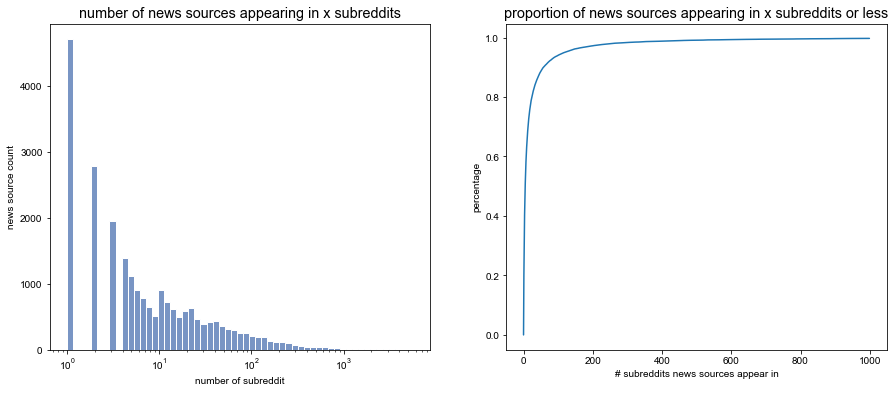

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.set(font_scale = 1.2)

sns.histplot(scf, log_scale=True, ax=ax1)
ax1.set_xlabel("number of subreddit")
ax1.set_ylabel("news source count")
ax1.set_title("number of news sources appearing in x subreddits")

sns.lineplot(x=[k[0] for k in pct_in_k_subreddits],
             y=[k[1] for k in pct_in_k_subreddits],
            ax=ax2)
ax2.set_ylabel("percentage")
ax2.set_xlabel("# subreddits news sources appear in")
ax2.set_title("proportion of news sources appearing in x subreddits or less")
# ax2.set(xlim = (0, 200))

In [47]:
# mean
statistics.mean(scf)

31.71021053081095

In [48]:
# median
statistics.median(scf)

5

In [49]:
len(scf)

23417

## For each news source let's count how many times they are shared regardless of in which subreddits

In [50]:
sum(dict().values())

0

In [51]:
def get_mention_count(ns):
    """get total mention count of ns in all six months"""
    count = 0
    files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
    for f in files:
        ns_dict = f.get(ns, dict())
        if len(ns_dict) > 0:
            mentions = sum([m[0] for m in ns_dict.values()])
            count += mentions
    return count

In [52]:
mention_count = dict()
for ns in ns_union:
    mention_count[ns] = get_mention_count(ns)

In [53]:
statistics.mean(mention_count.values())

272.5298714609045

In [54]:
statistics.stdev(mention_count.values())

3393.679434742994

In [55]:
statistics.median(mention_count.values())

10

In [56]:
len(mention_count)

23417

In [57]:
[(k, v, v/sum(mention_count.values())) for k,v in Counter(mention_count).most_common(20)]

[('mlb.com', 318947, 0.04997734192940209),
 ('theguardian.com', 195410, 0.03061973427066084),
 ('cnn.com', 138370, 0.021681861885427256),
 ('nytimes.com', 122156, 0.019141212115893994),
 ('foxnews.com', 106093, 0.016624223263790084),
 ('reuters.com', 85020, 0.01332219337644739),
 ('bbc.co.uk', 71901, 0.011266514066807148),
 ('breitbart.com', 57659, 0.009034866477212185),
 ('cnbc.com', 54874, 0.008598471410717174),
 ('thehill.com', 52715, 0.008260167299922655),
 ('cbc.ca', 52369, 0.008205950893097782),
 ('nypost.com', 52049, 0.008155808551525643),
 ('thestar.com', 48857, 0.007655638694343568),
 ('apnews.com', 48540, 0.007605966437223668),
 ('thehindu.com', 48046, 0.007528559197421681),
 ('dailymail.co.uk', 44123, 0.006913845428710753),
 ('independent.co.uk', 43839, 0.00686934410056548),
 ('washingtonpost.com', 43139, 0.006759657728376428),
 ('newsweek.com', 40879, 0.006405527441023204),
 ('bbc.com', 40236, 0.0063047726734266904)]

In [58]:
sum(mention_count.values())

6381832

In [59]:
news_ge10k = [m for m in mention_count if mention_count[m] >= 1000]
len(news_ge10k)

802

<AxesSubplot:ylabel='Count'>

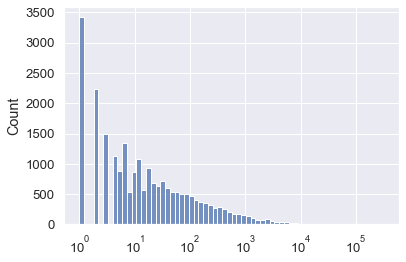

In [60]:
sns.histplot(list(mention_count.values()), log_scale=True)

<AxesSubplot:ylabel='Count'>

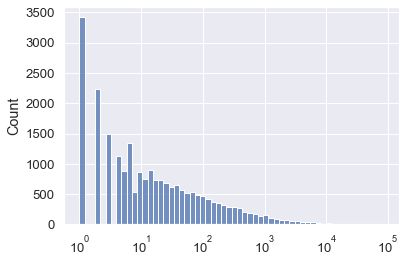

In [61]:
sns.histplot(list([k for k in mention_count.values() if k <100000]), log_scale=True)

In [62]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

35.34611606952214

35% are mentioned less than 5 times

In [63]:
(1-0.35)*len(mention_count)

15221.050000000001

In [64]:
statistics.median(mention_count.values())

10

50% are mentioned less than 10 times

In [65]:
centered = set([k for k,_ in Counter(mention_count).most_common(20)]) - set([k for k,_ in sde_ranked[:20]])
centered

{'breitbart.com',
 'cbc.ca',
 'foxnews.com',
 'mlb.com',
 'newsweek.com',
 'thehill.com',
 'thehindu.com',
 'thestar.com'}

In [66]:
# finding rank of breitbart.com
counter = 1
for k,v in sde_ranked:
    if k in centered: print(counter, k, v)
    counter += 1

23 thehill.com 2294
24 cbc.ca 2252
26 newsweek.com 2210
29 foxnews.com 1755
108 thestar.com 789
209 thehindu.com 504
215 breitbart.com 496
522 mlb.com 237


In [67]:
# mention_count vs sde_ranked

In [68]:
ns_union_list = list(ns_union)

j = [mention_count[k] for k in ns_union_list]
p = [subreddit_count[k] for k in ns_union_list]

In [72]:
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [104]:
df = pd.DataFrame({"subreddit_count": p,
                       "mention_count": j,
                       "source": ns_union_list})

f = px.scatter(df, x='subreddit_count', y='mention_count',
                    # z='pc3', 
                    # color='pc4',
                    hover_name='source', 
                    opacity=0.4,
               log_y=True,
               log_x=True,
               labels={"subreddit_count": "Subreddit count", "mention_count": "Mention count"},
               title = "Subreddit count v. Mention count of News Sources",
               width = 600,
#                length=600
              )

f.add_hline(y=1000, line_width=1, line_color="green")
f.add_vline(x=1000, line_width=1, line_color="orange")

# f.add_hrect(y0=1, y1=100, x0=1, x1=100, line_width=0, fillcolor="red", opacity=0.2)

# a = px.scatter(df, x=p, y=j)
# a.set(xlabel="number of unique news sources",
#       ylabel="total news links shared",
# #       xscale="log",
# #       yscale="log",
#       title="Total news link vs Number of unique news sources in subreddits")

# fig.show()

In [85]:
dir(f)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_annotation_like',
 '_allow_disable_validation',
 '_animation_duration_validator',
 '_animation_easing_validator',
 '_batch_layout_edits',
 '_batch_trace_edits',
 '_bracket_re',
 '_build_dispatch_plan',
 '_build_update_params_from_batch',
 '_config',
 '_data',
 '_data_defaults',
 '_data_objs',
 '_data_validator',
 '_dispatch_layout_change_callbacks',
 '_dispatch_trace_change_callbacks',
 '_filter_by_selector',
 '_frame_objs',
 '_frames_validator',
 '_get_child_prop_defaults',
 '_get_child_props',
 '_get_subplot_coordinates',
 '_get_subplot_rows_columns',
 

## For each subreddit let's count how many news sources were mentioned in it

Counting how many news sources were mentioned in each subreddit

In [64]:
nsc_count = dict()
for sr in sr_union:
    nsc_count[sr] = len(set(subreddit_ns_jan.get(sr, dict()).keys()) 
                               | set(subreddit_ns_feb.get(sr, dict()).keys()) 
                               | set(subreddit_ns_march.get(sr, dict()).keys()) 
                               | set(subreddit_ns_april.get(sr, dict()).keys())
                               | set(subreddit_ns_may.get(sr, dict()).keys()) 
                               | set(subreddit_ns_jun.get(sr, dict()).keys()))

`nsc_count` stores how many news sources appear in each subreddit.

In [65]:
len([k for k in nsc_count if nsc_count[k]<1])

0

In [66]:
nsc_count_freq = dict(Counter(nsc_count.values()).most_common())
nsc_count_freq

{1: 14979,
 2: 5025,
 3: 3027,
 4: 2157,
 5: 1616,
 6: 1455,
 7: 1083,
 8: 1040,
 9: 876,
 10: 752,
 11: 642,
 12: 558,
 13: 519,
 14: 476,
 15: 387,
 16: 376,
 18: 351,
 17: 341,
 19: 302,
 20: 298,
 22: 238,
 21: 233,
 24: 216,
 23: 209,
 25: 190,
 28: 178,
 27: 176,
 26: 176,
 29: 163,
 30: 150,
 32: 142,
 31: 129,
 33: 128,
 34: 118,
 36: 115,
 35: 112,
 39: 103,
 37: 101,
 41: 85,
 40: 85,
 38: 83,
 42: 79,
 44: 78,
 43: 76,
 52: 76,
 49: 68,
 48: 67,
 47: 66,
 45: 66,
 50: 65,
 51: 59,
 53: 59,
 55: 56,
 46: 53,
 58: 51,
 56: 51,
 59: 47,
 63: 42,
 62: 42,
 54: 41,
 61: 40,
 60: 38,
 64: 38,
 68: 36,
 77: 36,
 66: 36,
 65: 34,
 67: 32,
 74: 32,
 70: 31,
 57: 31,
 71: 29,
 73: 28,
 80: 28,
 72: 28,
 93: 26,
 81: 26,
 69: 26,
 79: 25,
 85: 25,
 88: 24,
 83: 24,
 82: 24,
 86: 24,
 76: 22,
 75: 22,
 78: 20,
 94: 20,
 91: 19,
 110: 19,
 103: 18,
 104: 18,
 84: 18,
 89: 18,
 118: 17,
 116: 17,
 87: 17,
 97: 17,
 141: 16,
 112: 16,
 101: 16,
 130: 15,
 102: 15,
 111: 15,
 132: 15,
 98: 

`nsc_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [67]:
max(nsc_count_freq.keys())

3603

In [68]:
nsc_ranked = Counter(nsc_count).most_common()

for t in nsc_ranked:
    sr, co = t
    if co >= 80:
        print(f"{sr} has {co} news sources mentioned in it.")

COVID_CANADA has 3603 news sources mentioned in it.
news has 3451 news sources mentioned in it.
politics has 3043 news sources mentioned in it.
todayilearned has 2947 news sources mentioned in it.
Coronavirus has 2612 news sources mentioned in it.
worldnews has 2564 news sources mentioned in it.
nottheonion has 2444 news sources mentioned in it.
prisons has 2309 news sources mentioned in it.
NoFilterNews has 2254 news sources mentioned in it.
conspiracy has 2098 news sources mentioned in it.
wallstreetbets has 1997 news sources mentioned in it.
tomorrowsworld has 1877 news sources mentioned in it.
autotldr has 1754 news sources mentioned in it.
Conservative has 1728 news sources mentioned in it.
NoNewNormal has 1590 news sources mentioned in it.
CryptoCurrency has 1542 news sources mentioned in it.
technology has 1523 news sources mentioned in it.
europe has 1432 news sources mentioned in it.
electionReformNews has 1423 news sources mentioned in it.
HumanTraffickingNews has 1338 news s

In [69]:
sum(nsc_count_freq.values()) == len(sr_union)

True

In [70]:
import itertools

In [71]:
nsc = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in nsc_count_freq.items()))

Text(0.5, 1.0, 'number of subreddits with x news sources')

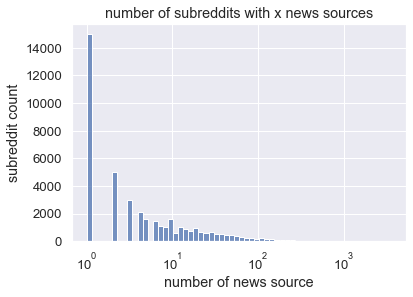

In [72]:
sns.histplot(nsc, log_scale=True)
plt.xlabel("number of news source")
plt.ylabel("subreddit count")
plt.title("number of subreddits with x news sources")

In [73]:
len([n for n in nsc if n>=20])

6932

How many subreddits only mentioned 5 news sources or less?

In [74]:
def pct_subreddits_mentioning_k_newssources(ks):
    sr_mention_i_nsc = [k for k in nsc_count if nsc_count[k] <= ks]
    count = len(sr_mention_i_nsc)
    print("There are {} subreddits mentioning in only {} news sources or less ({}%)".format(count, ks, count/len(sr_union)))
    return count/len(sr_union)

In [75]:
pct_subreddits_mentioning_k_newssources(20)

There are 36260 subreddits mentioning in only 20 news sources or less (0.8453396745465567%)


0.8453396745465567

In [76]:
# mean
statistics.mean(nsc)

17.31146547302653

In [77]:
# median
statistics.median(nsc)

3.0

In [78]:
(1-pct_subreddits_mentioning_k_newssources(100)) * len(nsc_count)

There are 41516 subreddits mentioning in only 100 news sources or less (0.9678742947731618%)


1377.9999999999986

### Let's disregard subreddits that mention less than 20 news sources

In [79]:
subreddit_non_outlier = [k for k in nsc_count if nsc_count[k] >= 20]

In [80]:
len(subreddit_non_outlier)

6932

## For each subreddit let's count total submissions that are news source related

In [81]:
def get_submission_count(sb):
    """get total mention count of ns in all six months"""
    count = 0
    files = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
    for f in files:
        sb_dict = f.get(sb, dict())
        if len(sb_dict) > 0:
            mentions = sum([m[0] for m in sb_dict.values()])
            count += mentions
    return count

In [82]:
mention_count = dict()
for sb in sr_union:
    mention_count[sb] = get_submission_count(sb)

In [83]:
statistics.mean(mention_count.values())

148.78146127663544

In [84]:
statistics.stdev(mention_count.values())

1619.2466058609966

In [85]:
statistics.median(mention_count.values())

5.0

In [86]:
len(mention_count)

42894

In [87]:
Counter(mention_count).most_common(20)

[('politics', 136899),
 ('TheNewsFeed', 91784),
 ('news', 84656),
 ('TrendingQuickTVnews', 82824),
 ('COVID_CANADA', 76571),
 ('worldnews', 68589),
 ('Conservative', 53941),
 ('THEHINDUauto', 44130),
 ('niuz', 43845),
 ('NoFilterNews', 43261),
 ('nofeenews', 40684),
 ('TORONTOSTARauto', 39281),
 ('trendandstyle', 38133),
 ('CertifiedNews', 38011),
 ('WrestlingBreakingNews', 37277),
 ('FOXauto', 36228),
 ('NewsfeedForWork', 34863),
 ('Coronavirus', 34075),
 ('UKNewsByABot', 33001),
 ('nytimes', 31007)]

In [88]:
ns_subreddit_01['cbc.ca']

{'todayilearned': [17, 14.780000000000001, 2038],
 'JoeRogan': [1, 0.76, 3],
 'knowyourshit': [3, 2.92, 1],
 'collapse': [7, 6.280000000000001, 58],
 'marginal': [3, 3.0, 0],
 'conspiracy': [11, 8.9, 649],
 'politics': [121, 107.37999999999998, 227661],
 'CPTSD': [1, 1.0, 1],
 'VideoEditing': [1, 0.98, 38],
 'wallstreetbets': [15, 13.129999999999999, 115],
 'hackernews': [8, 5.92, 8],
 'patient_hackernews': [8, 8.0, 8],
 'unitedkingdom': [2, 1.82, 19],
 'Catholicism': [1, 1.0, 2],
 'books': [6, 5.2, 15],
 'hackerdigest': [1, 1.0, 0],
 'Snorkblot': [2, 2.0, 2],
 'UnresolvedMysteries': [18, 17.439999999999998, 1033],
 'TrueUnpopularOpinion': [2, 1.3, 32],
 'SPACs': [2, 1.8, 152],
 'aznidentity': [1, 0.98, 40],
 'badgovnofreedom': [34, 34.0, 1],
 'cyberpunkgame': [1, 0.4, 3],
 'CBC_': [9, 8.84, 1],
 'newjersey': [1, 0.8, 25],
 'newfoundland': [28, 25.439999999999994, 406],
 'Hamilton': [42, 35.79, 950],
 'Oshawa': [1, 0.9, 5],
 'RedditTLDR': [5, 4.67, 1],
 'Sino': [1, 0.96, 18],
 'Sorcere

<AxesSubplot:ylabel='Count'>

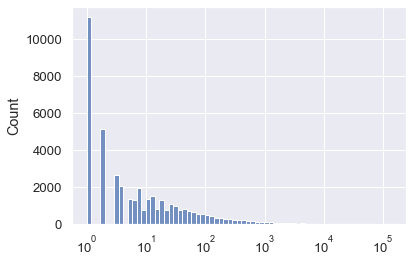

In [89]:
sns.histplot(list(mention_count.values()), log_scale=True)

In [90]:
len([k for k in mention_count.values() if k <10])*100/len(mention_count)

61.79652165804075

In [91]:
(0.39)*len(mention_count)

16728.66

In [92]:
statistics.median(mention_count.values())

5.0

In [93]:
non_outlier = [n for n in ns_union if subreddit_count[n]>50]
len(non_outlier)

2647

In [94]:
subreddit_non_outlier = [s for s in sr_union if mention_count[s]>150]
len(subreddit_non_outlier)

3351

 ## nsc vs mention_count

In [226]:
mention_count["politics"]

136899

In [228]:
nsc_count["politics"]

3043

In [230]:
m = [mention_count[k] for k in sr_union]
n = [nsc_count[k] for k in sr_union]

[Text(0.5, 0, 'number of unique news sources'),
 Text(0, 0.5, 'total news links shared'),
 Text(0.5, 1.0, 'Total news link vs Number of unique news sources in subreddits')]

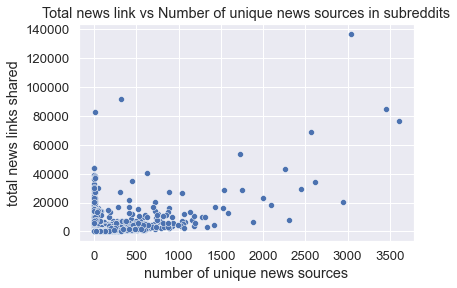

In [237]:
a = sns.scatterplot(x=n, y=m)
a.set(xlabel="number of unique news sources",
      ylabel="total news links shared",
      title="Total news link vs Number of unique news sources in subreddits")

In [239]:
# identifying subreddits with lots links but few ns
llbfn = [k for k in sr_union if mention_count[k]>10000 and nsc_count[k]<100]

In [240]:
llbfn

['TopDesign',
 'BBCauto',
 'RedditSample',
 'NYTauto',
 'TORONTOSTARauto',
 'niuz',
 'CHICAGOSUNauto',
 'LATIMESauto',
 'BiologyPreprints',
 'Torontobluejays',
 'referralcodes',
 'ARABIYAauto',
 'NYYankees',
 'KCRoyals',
 'SCMPauto',
 'THEHILLauto',
 'InNews',
 'Reds',
 'DemocraticUnderground',
 'IOLauto',
 'rawuncutnewss',
 'GUARDIANauto',
 'telex',
 'newsdk',
 'UKNewsByABot',
 'trendandstyle',
 'CHICubs',
 'News_Feed',
 'SMHauto',
 'CNET_ALL_RSS',
 'TWTauto',
 'nytimes',
 'CHICAGOTRIBauto',
 'TIMESINDIAauto',
 'USATODAYauto',
 'motorcitykitties',
 'TrendingQuickTVnews',
 'ColoradoRockies',
 'chpresseschau',
 'NewsOfTheUK',
 'NZHauto',
 'NBCauto',
 'viral',
 'I_N_D_I_A',
 'THEHINDUauto',
 'NewYorkMets',
 'FOXauto',
 'StonkFeed',
 'GameDeals',
 'wwe_network',
 'boardgamerecommender',
 'buccos',
 'StateoftheUnionNONF',
 'Padres',
 'TheColorIsBlue',
 'IRISHTIMESauto',
 'Dodgers',
 'CertifiedNews',
 'WrestlingBreakingNews',
 'MBauto',
 'SAtechnews',
 'BreitbartNews',
 'brasilnoticias',
 '

In [242]:
import scipy.stats

In [243]:
scipy.stats.pearsonr(m,n)

(0.553051286824415, 0.0)

## Cluster Try Out

First, I make a list of subreddits with fixed order, where I only include subreddits where our non_outlier news sources are mentioned in.

In [95]:
len(non_outlier)

2647

In [96]:
# only intersection
len(set(non_outlier) & set(nss))

2631

In [97]:
non_outlier = list(set(non_outlier) & set(nss))

In [98]:
len(non_outlier)

2631

In [99]:
# subreddits = subs
subreddits = set()
nsr_files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
# first, I filter for only the subreddits in which our news sources are mentioned
c = 0
for n in non_outlier:
    subreddits = (subreddits | (set(ns_subreddit_01.get(n, dict()).keys()) 
                               & set(ns_subreddit_02.get(n, dict()).keys()) 
                               & set(ns_subreddit_03.get(n, dict()).keys()) 
                               & set(ns_subreddit_04.get(n, dict()).keys())
                               & set(ns_subreddit_05.get(n, dict()).keys()) 
                               & set(ns_subreddit_06.get(n, dict()).keys())))
    c += 1
    if c%100==0: print(f"done {c}")
subreddits = list(subreddits)
len(subreddits)

done 100
done 200
done 300
done 400
done 500
done 600
done 700
done 800
done 900
done 1000
done 1100
done 1200
done 1300
done 1400
done 1500
done 1600
done 1700
done 1800
done 1900
done 2000
done 2100
done 2200
done 2300
done 2400
done 2500
done 2600


3636

There are 4k subreddits.

In [100]:
len(set(subreddits) & set(subreddit_non_outlier))

2438

In [101]:
subreddits = list(set(subreddits) & set(subreddit_non_outlier))

In [102]:
subreddits[-10:]

['italy',
 'byebyejob',
 'whowouldwin',
 'quefaitlapolice',
 'patient_hackernews',
 'russiawarinukraine',
 'YangForPresidentHQ',
 'dataisbeautiful',
 'PublicLands',
 'Techfeed']

In [103]:
len(subreddits)

2438

If I should order them later, I can do so.

## Incorporating subscribers information

In [104]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")

In [105]:
sfp = os.path.join(pd1,"data/subreddits")

In [106]:
# Let's only use the subreddits that have lots of subscribers
with open (os.path.join(sfp,"subreddit_subscribers.json"), "r", encoding = "utf-8") as infile:
    subreddit_subscribers = json.load(infile)

In [107]:
subreddit_subscribers['politics']

6201779

In [108]:
len(subreddit_subscribers)

49055

In [109]:
# subreddits = subreddit_non_outlier #sr_union
# len(subreddits)

In [110]:
subreddits_w_subc = [k for k in subreddits if k in subreddit_subscribers]
len(subreddits_w_subc)

2189

It seems that there are `None` values, so let's filter those subreddits out.

In [111]:
print([s for s in subreddits_w_subc if subreddit_subscribers[s] is None])

[]


In [112]:
subreddits_w_subc = [s for s in subreddits_w_subc if subreddit_subscribers[s] is not None]

In [113]:
len(subreddits_w_subc)

2189

Now, I will sort the 8,294 subreddits based on the # of their subscribers in a descending order.

In [114]:
srs_all = sorted(subreddits_w_subc, key= lambda x: subreddit_subscribers[x], reverse= True)

Text(0.5, 1.0, 'Subreddits Subscribers')

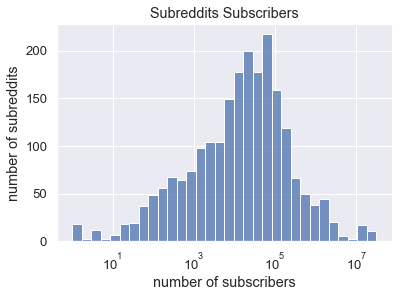

In [115]:
# plt.hist([math.log(subreddit_subscribers[s],10) for s in srs_all if subreddit_subscribers[s] > 0])
sns.histplot([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s]>0], log_scale=True)
# plt.hist([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s] > 0])
# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("number of subreddits")
plt.xlabel("number of subscribers")
plt.title("Subreddits Subscribers")
# log scale for both x and y

Which subreddits are the top three?

In [116]:
print([(s,subreddit_subscribers[s]) for s in srs_all if subreddit_subscribers[s]>10000])

[('funny', 31060166), ('gaming', 26628444), ('pics', 24911449), ('science', 24268001), ('worldnews', 24253881), ('Music', 24041486), ('videos', 23114010), ('movies', 23087255), ('todayilearned', 23030716), ('news', 20935015), ('askscience', 19222916), ('books', 18078148), ('Art', 17826701), ('sports', 17292578), ('nottheonion', 17063313), ('space', 16937271), ('gadgets', 16890685), ('television', 16595714), ('Documentaries', 16293009), ('UpliftingNews', 15926382), ('InternetIsBeautiful', 15019126), ('history', 14885003), ('philosophy', 14818794), ('Futurology', 14675526), ('dataisbeautiful', 14612638), ('personalfinance', 14176579), ('TwoXChromosomes', 12782590), ('memes', 10670593), ('technology', 9065541), ('WTF', 6224561), ('politics', 6201779), ('interestingasfuck', 5807636), ('travel', 4489082), ('leagueoflegends', 4184297), ('facepalm', 4046462), ('NatureIsFuckingLit', 3790070), ('pcmasterrace', 3722335), ('Whatcouldgowrong', 3569470), ('nba', 3310886), ('PS4', 3291344), ('photog

In [117]:
list(subreddit_subscribers.values()).count(None)

25

In [118]:
statistics.median([k for k in list(subreddit_subscribers.values()) if k is not None])

1420.0

In [119]:
statistics.mean([k for k in list(subreddit_subscribers.values()) if k is not None])

50070.832184376915

## Building `ns_repr`

Which will be in the form of feature-based matrix, where each row represents a news source, and columns representing subreddits. 

Idea 1: Each subreddit will be represented by 18 columns: unweighted count, upvote based weighted count, and comment based weighted count for each of the six months that we are interested in. THIS does not work.

Idea 2: Each subreddit will be represented by 3 columns: average unweighted count, average upvote based weighted count, and average comment based weighted count.

In [120]:
srs = srs_all

In [121]:
a = {"a": 1, "b": 2}
b = {"b": 1, "c": 2}
res = {**a, **b}
res

{'a': 1, 'b': 1, 'c': 2}

Idea 1: For each news source, I create a list of length `(18 * # subreddits)`.

Idea 1: For each news source, I create a list of length `(3 * # subreddits)`

Old code
```
# here I will cast the inner dictionaries of ns_subreddits to be Counter so I can avoid a lot of if-else statements
files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
for f in files:
    for k in f: # k is each news source
        for ns in f[k]:
            # averaging based on weighted counts
            count, upv, comm = f[k][ns]
            avg = (upv + comm)/count
            f[k][ns] = avg
        f[k] = Counter(f[k])
```

In [122]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [123]:
len(non_outlier)

2631

In [124]:
len(srs)

2189

I tried and found out that using all 23.7k subreddits results in MemoryError. So I should use less

In [125]:
srs = srs_all

For idea 1:

```
ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the 18*length(subreddits) features
    for f in files_sub:
        for idx in range(len(srs)):
            # making sure the ordering follows `srs` based on subscribers
            ns_sr_rep[ns] += f[ns][srs[idx]][1:] if (ns in f and srs[idx] in f[ns]) else [0, 0]
    ncount += 1
    if ncount%200==0: print(ncount)
```

In [126]:
# For idea 2

ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the length(subreddits) features
    for idx in range(len(srs)):
        # making sure the ordering follows `srs` based on subscribers
        current_sr = srs[idx]
        # avg_unweighted_counts = sum([ii[current_sr][ns][0] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        avg_votebased_counts = sum([ii[current_sr][ns][1] if (current_sr in ii and ns in ii[current_sr]) else 0 for ii in files_sub])/6
        avg_commentbased_counts = sum([ii[current_sr][ns][2] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        ns_sr_rep[ns] += [avg_votebased_counts, avg_commentbased_counts]
    ncount += 1
    if ncount%500==0: print(ncount)

500
1000
1500
2000
2500


In [127]:
len(srs)

2189

In [128]:
len(non_outlier)

2631

    code started at 22:56

Let's see one example of representation for `nytimes.com`.

In [129]:
ns_sr_rep["bbc.co.uk"]

[2.1533333333333333,
 3.6666666666666665,
 5.159999999999999,
 27.0,
 0.0,
 0.0,
 3.595,
 132.83333333333334,
 228.93999999999997,
 11514.833333333334,
 3.1966666666666668,
 15.0,
 2.19,
 0.6666666666666666,
 3.936666666666667,
 162.33333333333334,
 42.788333333333334,
 2610.8333333333335,
 141.6733333333333,
 5919.333333333333,
 0.31,
 180.0,
 1.0216666666666667,
 413.1666666666667,
 0.2333333333333333,
 0.5,
 6.336666666666669,
 223.33333333333334,
 64.68,
 3033.5,
 5.613333333333333,
 443.1666666666667,
 0.3133333333333333,
 85.83333333333333,
 5.836666666666666,
 441.8333333333333,
 3.2600000000000002,
 9.833333333333334,
 21.083333333333332,
 821.1666666666666,
 0.049999999999999996,
 1.0,
 2.478333333333333,
 120.16666666666667,
 0.12833333333333333,
 1.0,
 3.045,
 304.8333333333333,
 0.11499999999999999,
 0.0,
 0.0,
 0.0,
 3.9250000000000003,
 322.6666666666667,
 0.16666666666666666,
 0.16666666666666666,
 17.37,
 1391.5,
 1.9116666666666668,
 6.333333333333333,
 43.336666666666

Let's investigate the sparsity of our data

In [130]:
from numpy import array
from numpy import count_nonzero
from scipy.sparse import csr_matrix

In [131]:
# ns_repr, ns_fixed = np.array([v[1] for v in items]), list([v[0] for v in items]) # this causes memory error
## MemoryError: Unable to allocate 15.3 GiB for an array with shape (11436, 180000) and data type float64
items = ns_sr_rep.items()
ns_repr = np.array([k for k in ns_sr_rep.values()])

In [132]:
sparsity = 1.0 - np.count_nonzero(ns_repr)/ns_repr.size

In [133]:
sparsity

0.9612989275182797

In [134]:
# len([k for k in ns_repr if sum(k)==0.0]) # number of news sources with all 0's = 3

Wow very high sparsity.

In [135]:
len(non_outlier)

2631

How many subreddits have all 0's for all news sources?

    counter = 0
    for ii in range(len(srs)):
        fl = []
        for kk in ns_repr:
            fl.append(kk[ii])
        counter += 1
        print(statistics.median(fl), statistics.mean(fl), statistics.variance(fl), counter)

In [136]:
# convert to sparse matrix (CSR method)
S = csr_matrix(ns_repr)
print(S)

  (0, 8)	1.89
  (0, 9)	26.0
  (0, 16)	0.25833333333333336
  (0, 17)	1.6666666666666667
  (0, 18)	0.6066666666666667
  (0, 19)	13.0
  (0, 28)	0.305
  (0, 29)	0.5
  (0, 60)	0.16666666666666666
  (0, 61)	0.16666666666666666
  (0, 86)	0.12
  (0, 87)	0.16666666666666666
  (0, 92)	0.31666666666666665
  (0, 93)	15.833333333333334
  (0, 112)	0.26
  (0, 113)	0.6666666666666666
  (0, 184)	0.16666666666666666
  (0, 185)	0.16666666666666666
  (0, 194)	0.14166666666666666
  (0, 195)	3.8333333333333335
  (0, 232)	0.135
  (0, 233)	0.3333333333333333
  (0, 240)	0.15833333333333333
  (0, 288)	0.29666666666666663
  (0, 289)	0.5
  :	:
  (2630, 3768)	0.8333333333333334
  (2630, 3769)	0.8333333333333334
  (2630, 3790)	1.0
  (2630, 3850)	0.815
  (2630, 3851)	2.8333333333333335
  (2630, 3874)	593.2883333333333
  (2630, 3875)	13.0
  (2630, 3910)	0.08333333333333333
  (2630, 3911)	0.16666666666666666
  (2630, 3954)	1.0033333333333334
  (2630, 3955)	7.5
  (2630, 3958)	7.801666666666667
  (2630, 3959)	8.83333333

### Now PCA

In [137]:
print([k for k in ns_repr[21:50]])

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 1.06333333, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.12166667, 0.16666667, 0.        , ..., 0.        , 0.        ,
       0.        ]), array([2.07833333, 7.33333333, 2.80166667, ..., 0.16666667, 1.27833333,
       0.5       ]), array([0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
       0.        ]), array([0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), ar

In [138]:
len(ns_repr)

2631

In [139]:
len(ns_repr[0])/2

2189.0

In [140]:
svd = TruncatedSVD(n_components=1000) #, n_iter=7, random_state=42)
svd_pca = PCA(n_components=min(len(ns_repr), len(ns_repr[0])))

In [141]:
# fit1 = svd.fit(csr_matrix(MaxAbsScaler().fit_transform(np.array(ns_repr))))
fit1 = svd_pca.fit(StandardScaler().fit_transform(np.array(ns_repr)))

In [142]:
explained_var = fit1.explained_variance_ratio_

In [143]:
explained_var[:10]

array([0.0861328 , 0.02367493, 0.02243569, 0.02114634, 0.01622741,
       0.01537187, 0.01380669, 0.01368664, 0.01197435, 0.0112631 ])

    # what about if PCA into 4
    svd_pca4 = PCA(n_components=4)
    fit4 = svd_pca4.fit(StandardScaler().fit_transform(np.array(ns_repr)))
    explained_var4 = fit4.explained_variance_ratio_
    explained_var4 # array([0.15789766, 0.03065203, 0.02409428, 0.01931646])

So PCA into 2k then extracting the first 4 is the same as PCA into 4

In [144]:
len(explained_var)

2631

In [145]:
fit1.explained_variance_ratio_.sum()

1.0

In [146]:
explained_var_sums = [sum(explained_var[:d]) for d in range(len(explained_var))]

In [147]:
explained_var_sums

[0,
 0.08613279641316636,
 0.10980772320850327,
 0.1322434175327341,
 0.15338975819769574,
 0.16961716943626215,
 0.18498904253036522,
 0.19879573018673535,
 0.21248236708663865,
 0.22445671355911656,
 0.23571981002257145,
 0.24637374976849868,
 0.25593299446752554,
 0.2649229921536776,
 0.273532668874724,
 0.28169040890437924,
 0.28917232298447104,
 0.29657517953401513,
 0.3036820491033786,
 0.31040755671959214,
 0.3169127763586937,
 0.32303869812747094,
 0.32903943146754033,
 0.3348985746557738,
 0.34036420164648473,
 0.3456178912394387,
 0.35084294851141984,
 0.3557426751469956,
 0.36048051479907633,
 0.36505525342580514,
 0.36946572801119987,
 0.373731661999309,
 0.3778986646595035,
 0.38204590241224484,
 0.3858498360547738,
 0.3896332675038235,
 0.39335131591792927,
 0.3970443385325289,
 0.4006948087457791,
 0.4042943370897211,
 0.40785401983096986,
 0.4113583033352162,
 0.4148016885832185,
 0.4181987922697953,
 0.4215364005318593,
 0.42477374338771284,
 0.427875126616821,
 0.4309

<AxesSubplot:>

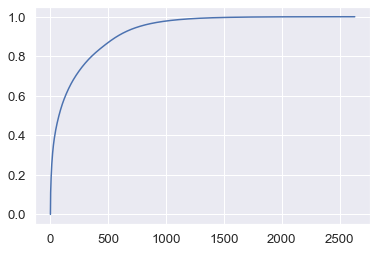

In [148]:
sns.lineplot(x=range(len(explained_var_sums)), y=explained_var_sums)

In [149]:
explained_var_sums[99]

0.551200533056498

Now, I will cast those list representation values to be numpy arrays so I can preprocess them easily. Further, I will normalize each array.

*side note: `preprocessing.normalize` vs `standardscaler`*

In [150]:
preprocessing.normalize(np.array([[1,100,2,3],[2,50,100,10]]))

array([[0.00999301, 0.99930073, 0.01998601, 0.02997902],
       [0.01781459, 0.44536472, 0.89072943, 0.08907294]])

In [151]:
scaler = StandardScaler()
scaler.fit_transform(np.array([[1,100,2,3],[2,50,100,10],[2,50,100,10]]))

array([[-1.41421356,  1.41421356, -1.41421356, -1.41421356],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678]])

Now I'm thinking, should I *normalize* or *standardize*?

In [152]:
# for ns in ns_sr_rep:
#     rep = ns_sr_rep[ns]
#     ns_sr_rep[ns] = preprocessing.normalize(np.array([rep]))

## K-Means

Without and with standardization.

First, I need to find optimum `k`.

In [153]:
# ns_repr_new = fit1.transform(MaxAbsScaler().fit_transform(np.array(ns_repr))) #fit1 is PCA
ns_repr_new = fit1.transform(StandardScaler().fit_transform(np.array(ns_repr))) #fit1 is PCA

In [154]:
type(ns_repr_new)

numpy.ndarray

In [155]:
json.dump(old_ns_repr_new.tolist(), open("ns_repr_new.json", "w"), indent=4)

NameError: name 'old_ns_repr_new' is not defined

In [156]:
old_ns_repr_new = ns_repr_new

In [270]:
newssource_dict_fullrep = dict()

for ii in range(len(ns_fixed)):
    newssource_dict_fullrep[ns_fixed[ii]] = old_ns_repr_new[ii].tolist()
    
len(newssource_dict_fullrep) == len(ns_fixed)

True

In [271]:
# json.dump(newssource_dict_fullrep, open("newssource_dict_fullrep.json", "w"))

In [157]:
ns_repr_new = [k[:100] for k in ns_repr_new]

In [158]:
kmeans = KMeans(init = "k-means++",
               n_clusters = 100,
               n_init = 10,
               max_iter = 500)

Freezing the list for representations and the news sources.

In [159]:
kmeans.fit([v for v in ns_repr_new])

KMeans(max_iter=500, n_clusters=100)

In [160]:
ns_fixed = list(ns_sr_rep.keys())

In [161]:
for i,ns in enumerate(ns_fixed):
    if (ns_sr_rep[ns] == ns_repr[i]).all():
        pass
    else:
        print("False")
print("True")

True


In [162]:
kmeans.inertia_

780328.7770246518

In [163]:
kmeans.n_iter_

9

In [164]:
Counter(kmeans.labels_)

Counter({85: 2220,
         42: 10,
         95: 7,
         86: 12,
         12: 4,
         1: 1,
         52: 4,
         0: 149,
         91: 18,
         45: 14,
         43: 10,
         23: 1,
         92: 2,
         30: 8,
         10: 1,
         90: 9,
         41: 4,
         18: 12,
         70: 3,
         24: 1,
         19: 1,
         63: 3,
         75: 1,
         54: 8,
         4: 1,
         29: 1,
         80: 3,
         81: 1,
         99: 7,
         46: 1,
         74: 2,
         32: 3,
         59: 1,
         22: 3,
         84: 3,
         53: 1,
         73: 1,
         5: 1,
         83: 3,
         61: 3,
         89: 5,
         57: 5,
         69: 2,
         68: 2,
         8: 1,
         37: 1,
         40: 1,
         60: 2,
         55: 2,
         72: 5,
         64: 5,
         56: 1,
         26: 2,
         94: 3,
         6: 3,
         36: 1,
         51: 1,
         66: 1,
         17: 1,
         48: 1,
         28: 1,
         39: 2,
   

**Choosing the appropriate number of clusters**

1. Elbow method

In [165]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 360
}

In [166]:
sse = []
sc = []
chs = [] # bigger better
dbs = []

for k in range(2,41):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(ns_repr_new)
    sse.append(kmeans.inertia_)
    score = silhouette_score(ns_repr_new, kmeans.labels_)
    sc.append(score)
    chs_score = metrics.calinski_harabasz_score(ns_repr_new, kmeans.labels_)
    chs.append(chs_score)
    dbs_score = metrics.davies_bouldin_score(ns_repr_new, kmeans.labels_)
    dbs.append(dbs_score)
    print(f"have done {k} rounds, current sse is {sse}")

have done 2 rounds, current sse is [5675473.0181122525]
have done 3 rounds, current sse is [5675473.0181122525, 5425879.857937739]
have done 4 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997]
have done 5 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326]
have done 6 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326, 5075220.762522491]
have done 7 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326, 5075220.762522491, 5039940.389577008]
have done 8 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326, 5075220.762522491, 5039940.389577008, 4987089.648216272]
have done 9 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326, 5075220.762522491, 5039940.389577008, 4987089.648216272, 4852937.774081475]
have done 10 rounds,

have done 29 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326, 5075220.762522491, 5039940.389577008, 4987089.648216272, 4852937.774081475, 4764495.133990869, 4733369.644908249, 4542945.358132068, 4581766.237413807, 4494616.09706148, 4464937.706996072, 4327231.156451469, 4347612.8474948155, 4228871.776046835, 4231116.976933042, 4145027.906993777, 4124863.0325607834, 4019612.9294364075, 4034900.9041416985, 3994085.0043785693, 3950765.684964885, 3910813.011912265, 3807224.09728844, 3782993.55369418, 3715813.870468377]
have done 30 rounds, current sse is [5675473.0181122525, 5425879.857937739, 5263447.336870997, 5203046.676650326, 5075220.762522491, 5039940.389577008, 4987089.648216272, 4852937.774081475, 4764495.133990869, 4733369.644908249, 4542945.358132068, 4581766.237413807, 4494616.09706148, 4464937.706996072, 4327231.156451469, 4347612.8474948155, 4228871.776046835, 4231116.976933042, 4145027.906993777, 4124863.0325607834, 4019612.9

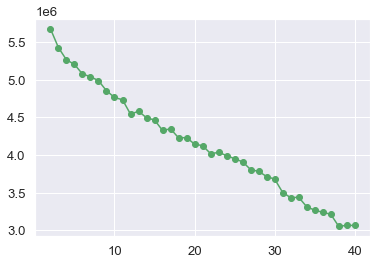

In [167]:
plt.plot(range(2,41),sse,"go-")
# plt.ylim([0,3500])

In [168]:
kl = KneeLocator(range(2,41), sse, curve="convex", direction="decreasing")

In [169]:
kl.elbow

12

### Silhouette Coefficient

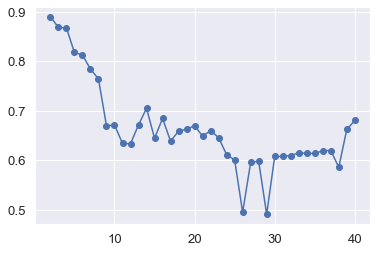

In [170]:
# for silhouette coefficient
plt.plot(range(2,41), sc, "bo-")

    spl = make_interp_spline(range(2,30), sc, k=3)  # type: BSpline

    xs = np.linspace(2, 30, 6)
    ys = spl(xs)

    plt.plot(range(2,30), sc, "go--")
    plt.plot(xs, ys, "b-")

### CHS

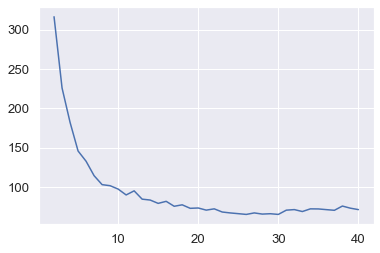

In [171]:
plt.plot(range(2,41), chs)

### DBS

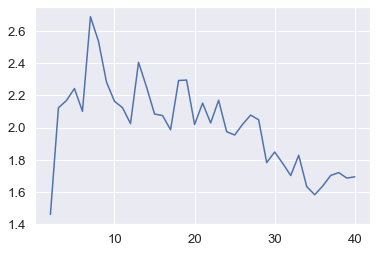

In [172]:
plt.plot(range(2, 41), dbs)

Let's choose k = 10

In [218]:
kmeans = KMeans(n_clusters = 10, init="k-means++", n_init = 50, max_iter = 500, random_state = 360)
kmeans.fit(ns_repr_new)

KMeans(max_iter=500, n_clusters=10, n_init=50, random_state=360)

In [174]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [176]:
Counter(kmeans.labels_)

Counter({0: 2598, 2: 1, 5: 24, 7: 1, 1: 1, 8: 1, 9: 1, 6: 2, 3: 1, 4: 1})

**Let's investigate each cluster**

In [177]:
len(ns_sr_rep)

2631

In [178]:
len(kmeans.labels_)

2631

In [179]:
clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = kmeans.labels_[idx]
    clustered[c].append(ns)

In [180]:
print([len(clustered[i]) for i in range(10)])

[2598, 1, 1, 1, 1, 24, 2, 1, 1, 1]


Let's see in terms of percentage

In [181]:
cluster_lens = [len(clustered[i]) for i in range(10)]

In [182]:
print([round(k*100/sum(cluster_lens),2) for k in cluster_lens])

[98.75, 0.04, 0.04, 0.04, 0.04, 0.91, 0.08, 0.04, 0.04, 0.04]


 **could do iterative clusters for ^**

In [183]:
clustered[0]

['dailymaverick.co.za',
 'roanoke.com',
 '10news.com',
 't-online.de',
 'dn.se',
 'journalnow.com',
 'thehindu.com',
 'bangkokpost.com',
 'square-enix.com',
 'missoulian.com',
 'thehustle.co',
 'delawareonline.com',
 'ecosia.org',
 'odt.co.nz',
 'clickorlando.com',
 'investorplace.com',
 'dotesports.com',
 'revealnews.org',
 'scotsman.com',
 'star-telegram.com',
 'smithsonianmag.com',
 'mindbodygreen.com',
 'cryptoslate.com',
 'inews.co.uk',
 'coingeek.com',
 'app.com',
 'utoronto.ca',
 'francebleu.fr',
 'onegreenplanet.org',
 'thelogicalindian.com',
 'pushsquare.com',
 'cleveland.com',
 'cbssports.com',
 'dailypress.com',
 'somersetlive.co.uk',
 'famitsu.com',
 'phillymag.com',
 'ed.ac.uk',
 'lse.ac.uk',
 'winnipegfreepress.com',
 'sapo.pt',
 'trtworld.com',
 'menshealth.com',
 'dallasobserver.com',
 'wvlt.tv',
 'nintendoeverything.com',
 'communityimpact.com',
 'nationalinterest.org',
 'protocol.com',
 'yardbarker.com',
 'mcall.com',
 'hightimes.com',
 'acast.com',
 'centralmaine.com

# Agglomerative (Hierarchical) Clustering

In [184]:
hclustering = AgglomerativeClustering(n_clusters=15)

In [185]:
hclustering.fit(ns_repr_new)

AgglomerativeClustering(n_clusters=15)

In [186]:
hclustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [187]:
hier_clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = hclustering.labels_[idx]
    hier_clustered[c].append(ns)

In [188]:
print([len(hier_clustered[i]) for i in range(15)])

[2588, 2, 19, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 8]


Let's see in terms of percentage

In [189]:
hcluster_lens = [len(hier_clustered[i]) for i in range(10)]

In [190]:
print([round(k*100/sum(hcluster_lens),2) for k in hcluster_lens])

[98.82, 0.08, 0.73, 0.04, 0.04, 0.04, 0.15, 0.04, 0.04, 0.04]


In [191]:
hier_clustered[14]

['cbssports.com',
 'bleacherreport.com',
 'theathletic.com',
 'nbcsports.com',
 'usatoday.com',
 'nfl.com',
 'pff.com',
 'si.com']

In [192]:
set(hier_clustered[0]) & set(clustered[4])

set()

## Visualizing PCA in 2D using tSNE

t-sne scales quadratically but perhaps we can run tSNE after PCA

In [193]:
from sklearn.manifold import TSNE

In [194]:
twodpca = TSNE(n_components=3, perplexity=75)

In [195]:
twodpca.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 75,
 'random_state': None,
 'verbose': 0}

In [196]:
from datetime import datetime

In [197]:
# fit2 = twodpca.fit_transform(MaxAbsScaler().fit_transform(np.array(ns_repr)))
# fit2 = twodpca.fit_transform(StandardScaler().fit_transform(np.array(ns_repr)))
print(datetime.now())
fit2 = twodpca.fit_transform(ns_repr_new)
print(datetime.now())

2022-04-03 12:38:59.311272
2022-04-03 12:39:44.539709


In [198]:
len(ns_repr_new[0])

100

In [ ]:
json.dump(fit2.tolist(), open("tsne_3d.json", "w"))

In [199]:
x = [k[0] for k in fit2]
y = [k[1] for k in fit2]
z = [k[2] for k in fit2]
# a = [k[3] for k in fit2]

Idea: show only news sources that are close to a particular news source

In [200]:
import plotly.express as px
import pandas

ns_fixed = list(ns_sr_rep.keys())

df = pandas.DataFrame({"pc1": x,
                   "pc2": y,
                   "pc3": z,
                   # "pc4": a,
                   "source": ns_fixed})

fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', 
                    # color='pc4',
                    hover_name='source', opacity=0.4)
fig.update_traces(marker_size = 4)

fig.show()

In [201]:
# ?px.scatter_3d

In [202]:
len(ns_repr_new)

2631

In [203]:
len(srs)

2189

In [204]:
len(ns_repr_new[0])

100

In [205]:
with open("ns_fixed.json", "w", encoding="utf-8") as f:
    json.dump(ns_fixed, f)

In [206]:
newssource_dict = dict()

for ii in range(len(ns_fixed)):
    newssource_dict[ns_fixed[ii]] = ns_repr_new[ii].tolist()
    
len(newssource_dict) == len(ns_fixed)

True

In [ ]:
json.dump(newssource_dict, open("newssource_dict.json", "w", encoding="utf-8"))

In [207]:
len(ns_fixed) == len(ns_repr_new)

True

In [217]:
sse = []
sc = []
chs = [] # bigger better
dbs = []

for k in range(2,41):
    kmeans_te = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans_te.fit(fit2)
    sse.append(kmeans_te.inertia_)
    score = silhouette_score(fit2, kmeans_te.labels_)
    sc.append(score)
    chs_score = metrics.calinski_harabasz_score(fit2, kmeans_te.labels_)
    chs.append(chs_score)
    dbs_score = metrics.davies_bouldin_score(fit2, kmeans_te.labels_)
    dbs.append(dbs_score)
    print(f"have done {k} rounds, current sse is {sse}")

have done 2 rounds, current sse is [2399692.5]
have done 3 rounds, current sse is [2399692.5, 1842070.125]
have done 4 rounds, current sse is [2399692.5, 1842070.125, 1493321.25]
have done 5 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375]
have done 6 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5]
have done 7 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75]
have done 8 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75, 937496.8125]
have done 9 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75, 937496.8125, 866172.5625]
have done 10 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75, 937496.8125, 866172.5625, 806768.9375]
have done 11 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75, 937496.8125, 866172.

have done 36 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75, 937496.8125, 866172.5625, 806768.9375, 748184.75, 694720.375, 664226.6875, 622775.3125, 590785.6875, 566227.625, 543218.4375, 520807.4375, 499950.5, 484974.0625, 464889.84375, 450404.5, 438547.3125, 423541.40625, 412968.9375, 404902.71875, 394555.3125, 379423.25, 374241.125, 361388.09375, 355299.78125, 346773.0625, 338455.15625, 332536.03125, 324231.78125, 318609.59375]
have done 37 rounds, current sse is [2399692.5, 1842070.125, 1493321.25, 1284609.375, 1129148.5, 1027808.75, 937496.8125, 866172.5625, 806768.9375, 748184.75, 694720.375, 664226.6875, 622775.3125, 590785.6875, 566227.625, 543218.4375, 520807.4375, 499950.5, 484974.0625, 464889.84375, 450404.5, 438547.3125, 423541.40625, 412968.9375, 404902.71875, 394555.3125, 379423.25, 374241.125, 361388.09375, 355299.78125, 346773.0625, 338455.15625, 332536.03125, 324231.78125, 318609.59375, 314494.0]
have done 38 rounds, curre

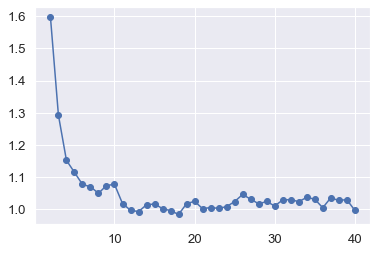

In [224]:
# for silhouette coefficient
plt.plot(range(2,41), dbs, "bo-")

In [210]:
# kmeans for fit2

kmeans_tsne = KMeans(n_clusters = 10, init="k-means++", n_init = 50, max_iter = 500, random_state = 360)
kf = kmeans_tsne.fit_transform(fit2)

In [211]:
clustered_tsne = defaultdict(list)
for idx,ns in enumerate(ns_fixed):
    c = kmeans_tsne.labels_[idx]
    clustered_tsne[c].append(ns)

In [212]:
print([len(clustered_tsne[i]) for i in range(10)])

[242, 217, 298, 263, 243, 248, 275, 337, 250, 258]


In [213]:
clustered_tsne[6]

['thehindu.com',
 'cryptoslate.com',
 'thelogicalindian.com',
 'trtworld.com',
 'nationalinterest.org',
 'flightglobal.com',
 'globaltimes.cn',
 'commentarymagazine.com',
 'democracynow.org',
 'vnexpress.net',
 'brusselstimes.com',
 'emerging-europe.com',
 'thebetterindia.com',
 '972mag.com',
 'thewire.in',
 'sixthtone.com',
 'yourstory.com',
 'military.com',
 'khaleejtimes.com',
 'jewishjournal.com',
 'eurasiantimes.com',
 'stripes.com',
 'europarl.europa.eu',
 'thedispatch.com',
 'af.mil',
 'dhakatribune.com',
 'newslaundry.com',
 'dw.com',
 'businesstoday.in',
 'cnbctv18.com',
 'un.org',
 'trust.org',
 'antiwar.com',
 'focustaiwan.tw',
 'opendemocracy.net',
 'ndtv.com',
 'u.today',
 'scmp.com',
 'barandbench.com',
 'pinkvilla.com',
 'albawaba.com',
 'rediff.com',
 'hongkongfp.com',
 'thelocal.de',
 'cyprus-mail.com',
 'dnaindia.com',
 'palestinechronicle.com',
 'usni.org',
 'aljazeera.com',
 'newsclick.in',
 'thestandard.com.hk',
 'cointelegraph.com',
 'straitstimes.com',
 'theafric

## Clustering evaluation

1. With all ns_intersection that are not outliers using subreddits that are not outliers => one cluster has almost everything.

In [219]:
# closer to 1 better
metrics.silhouette_score(ns_repr_new, kmeans.labels_, metric='euclidean', sample_size=3000)

# With all ns_union that are not outliers using subreddits that are not outliers => one cluster has almost everything.
# 8k news sources, _ subreddits, _ PCs
# 0.8726470867482576

# With all ns_intersection that are not outliers (th = 10) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 7060 news sources, 2662 subreddits, 100 PCs, 10 clusters
# 0.9426717858025625

# With ns_intersection that are not outliers (th = 50) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 2643 news sources, 1035 subreddits, 100 PCs, 10 clusters
# 0.8429645622533072

0.8650941406768776

In [220]:
# higher better
metrics.calinski_harabasz_score(ns_repr_new, kmeans.labels_)

# With all ns_intersection that are not outliers using subreddits that are not outliers => one cluster has almost everything.
# 8k news sources, _ subreddits, _ PCs
# 241.70519991875474

# With all ns_intersection that are not outliers (th = 10) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 7060 news sources, 2662 subreddits, 100 PCs, 10 clusters
# 413.048982936904

# With ns_intersection that are not outliers (th = 50) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 2643 news sources, 1035 subreddits, 100 PCs, 10 clusters
# 173.15845316896892

142.36974263255632

In [221]:
# closer to 0 better
metrics.davies_bouldin_score(ns_repr_new, kmeans.labels_)

# With all ns_intersection that are not outliers using subreddits that are not outliers => one cluster has almost everything.
# _ news sources, _ subreddits, _ PCs
# 1.3213014502791194

# With all ns_intersection that are not outliers (th = 10) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 7060 news sources, 2662 subreddits, 100 PCs, 10 clusters
# 0.8011239006104709

# With ns_intersection that are not outliers (th = 50) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 2643 news sources, 1035 subreddits, 100 PCs, 10 clusters
# 1.1818729937229002

0.7864399692262773

Insights

1. K-means suffers from high dimensionality, but just simply filtering for news sources with the most information and subreddits with the most news sources does not make clustering better. Perhaps should really filter for subreddits that are relevant.
2. After visualizing, the clusters that appear do make sense. t-SNE after PCA is a good idea. We will need further work to extract this. But with t-SNE you cannot interpret the distance between clusters A and B at different ends of your plot. t-SNE only for vis.
3. From the PCA then tSNE, we see that yes we can infer news source characteristics using audience-based metrics.
4. I should leave clustering here. Next step is to implement autoencoder for classifications.

### Let's see where our sport news are

In [ ]:
# finding their indices

In [ ]:
sport_news = json.load(open("sport_news_non_outlier.json", "r"))
len(sport_news)

In [ ]:
sport_news_idx = {}
for s in sport_news:
    try:
        sport_news_idx[s] = ns_fixed.index(s)
    except ValueError:
        pass

In [ ]:
len(sport_news_idx)

In [ ]:
# build their representation
sport_news_repr = {}
for s in sport_news_idx:
    sport_news_repr[s] = fit2[sport_news_idx[s]]

In [ ]:
sn_items = list(sport_news_repr.items())

sn_fixed = [k[0] for k in sn_items]

xs = [k[1][0] for k in sn_items]
ys = [k[1][1] for k in sn_items]
zs = [k[1][2] for k in sn_items]
# bs = [k[1][3] for k in sn_items]

In [ ]:
df = pandas.DataFrame({"pc1": xs[:100],
                   "pc2": ys[:100],
                   "pc3": zs[:100],
                   # "pc4": bs[:100],
                   "source": sn_fixed[:100]})

fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', 
                    # color='pc4', 
                    hover_name='source', opacity=0.4)
fig.show()

In [ ]:
len(ns_fixed)

In [ ]:
with open("ns_fixed.json", "w") as nsf:
    json.dump(ns_fixed, nsf)

In [ ]:
len(ns_fixed) == len(ns_repr_new)

In [ ]:
len(ns_repr_new[0])

In [ ]:
type(fit2)

In [ ]:
fit2.tolist()[0]